<a href="https://colab.research.google.com/github/kianahs/XGBoost_Diabet_Classifier/blob/master/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 کتابخانه های مورد نیاز را اضافه می کنیم



In [ ]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numbers

# **part 1**

داده ها را با کتابخانه ی پانداس خوانده و از آنها یک دیتافریم می سازیم



In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,Veggies,Heavy Alcohol Consumption,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8


ستون اول داده ها که آیدی افراد است را حذف می کنیم زیرا تاثیری در محاسبات ما ندارد و تنظیم می کنیم که تمامی ستون های دیتافریم نمایش داده شوند

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
print(df.columns)
pd.set_option("display.max_columns", None)
df

Index(['Diabetes_binary', 'HighBP', 'High Cholesterol', 'Cholesterol Check',
       'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical Activity',
       'Fruits', 'Veggies', 'Heavy Alcohol Consumption', 'Any Health Care',
       'No Doctor because of Cost', 'General Health', 'Mental Health',
       'Physical Health', 'Difficulty Walking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,Veggies,Heavy Alcohol Consumption,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


چک می کنیم که در ستون هر ویژگی چه تعداد مقدار نامعلوم وجود دارد 

In [ ]:
# col_modes = df.mode()
# print(col_modes)

df.isnull().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

مقادیر نامعلوم هر ستون را با مد آن ستون جایگزین می کنیم و در انتها مد تمامی ستون ها را پرینت می کنیم

In [ ]:
for col in df:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.mode()

,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,Veggies,Heavy Alcohol Consumption,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Medium,0.0,0.0,0.0,female,10.0,Cat6,Cat8
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


مجددا مقادیر نامعلوم هر ستون را چک می کنیم و مشاهده می شود که همگی جایگزین شده اند

In [ ]:
df.isnull().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       0
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              0
No Doctor because of Cost    0
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           0
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

سه لیست شامل ویژگی های عددی و غیر باینری و دسته بندی شده تعریف می کنیم (با توجه به ستون های دیتافریم)

In [ ]:
non_binary_cols = ['BMI','Mental Health','Physical Health','Age', 'General Health', 'Sex','Education','Income']
categorical_cols = ['General Health', 'Sex','Education','Income']
numerical_cols = ['BMI','Mental Health','Physical Health','Age']

حال روی دیتا های هر ستون از دیتافریم پیمایش انجام می دهیم و مقادیر را چک می کنیم که آیا با توجه به آن ستون مجازند یا خیر مثلا برای ستون های عددی چک می کنیم آیا همه ی داده های آنها عدد هستند یا خیر و مقدارشان مجاز است یا خیر

In [ ]:
for col, values in df.iteritems():
    print(col)
    if col not in non_binary_cols:
        
        for item in values:
            if item != 0.0 and item != 1.0:
                print(col,item)
                df.replace({col: item}, df.mode()[str(col)][0], inplace=True)
                
    elif col in categorical_cols:
        
         if col in ['Education','Income']:
                for item in values:
                    if (not isinstance(item, str)) or 'Cat' not in item:
                        print(col,item)
                        df.replace({col: item}, df.mode()[str(col)][0], inplace=True)
         elif col == 'Sex':
                for item in values:
                    if item not in ['female', 'male']:
                        print(col,item)
                        df.replace({col: item}, df.mode()[str(col)][0], inplace=True)
         elif col == 'General Health':
                for item in values:
                    if item not in ['High', 'Medium', 'Low', 'Very Low', 'Good']:
                        print(col,item)
                        df.replace({col: item}, df.mode()[str(col)][0], inplace=True)
    elif col in numerical_cols:
        
        if col in ['Physical Health','Mental Health']:
            for item in values:
                if (not isinstance(item, numbers.Number)) or item <0 or item>30:
                    print(col,item)
                    df.replace({col: item}, df.mode()[str(col)][0], inplace=True)
        elif col == 'Age':
            for item in values:
                if (not isinstance(item, numbers.Number)) or item <1 or item>122:
                    print(col,item)
                    df.replace({col: item}, df.mode()[str(col)][0], inplace=True)
        elif col == 'BMI':
            for item in values:
                 if (not isinstance(item, numbers.Number)) or item <7 or item>106:
                    print(col,item)
                    df.replace({col: item}, df.mode()[str(col)][0], inplace=True)
         
    

Diabetes_binary
HighBP
High Cholesterol
Cholesterol Check
BMI
Smoker
Stroke
HeartDiseaseorAttack
Physical Activity
Fruits
Veggies
Heavy Alcohol Consumption
Any Health Care
No Doctor because of Cost
General Health
Mental Health
Physical Health
Difficulty Walking
Sex
Age
Education
Income
Income Unknown


In [ ]:
df.isnull().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       0
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              0
No Doctor because of Cost    0
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           0
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

فاصله ها را در دیتافریم با ـ جایگزین می کنیم

In [ ]:
df.columns = df.columns.str.replace(' ','_')
df.replace(' ', '_', regex=True)
print(df.columns)
df

Index(['Diabetes_binary', 'HighBP', 'High_Cholesterol', 'Cholesterol_Check',
       'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical_Activity',
       'Fruits', 'Veggies', 'Heavy_Alcohol_Consumption', 'Any_Health_Care',
       'No_Doctor_because_of_Cost', 'General_Health', 'Mental_Health',
       'Physical_Health', 'Difficulty_Walking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,Heavy_Alcohol_Consumption,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


داده های عددی را با تقسیم آنها بر بزرگترین مقدار آن ستون نرمال می کنیم

In [ ]:
# copy the data
print(df.columns)
df_max_scaled = df.copy()

# apply normalization techniques on Column 1
columns = ['BMI','Mental_Health','Physical_Health','Age']
for column in columns:
    if is_numeric_dtype(column):
        df_max_scaled[column] = df_max_scaled[column] /df_max_scaled[column].abs().max()
  
# view normalized data
# display(df_max_scaled)
df = df_max_scaled
df

Index(['Diabetes_binary', 'HighBP', 'High_Cholesterol', 'Cholesterol_Check',
       'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical_Activity',
       'Fruits', 'Veggies', 'Heavy_Alcohol_Consumption', 'Any_Health_Care',
       'No_Doctor_because_of_Cost', 'General_Health', 'Mental_Health',
       'Physical_Health', 'Difficulty_Walking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,Heavy_Alcohol_Consumption,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


  را برای تمامی ستون هایی که حاوی ویژگی های دسته بندی شده هستند انجام می دهیم one hot encoding 

In [ ]:
categorical_columns = ['General_Health', 'Sex','Education','Income']
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,Heavy_Alcohol_Consumption,Any_Health_Care,No_Doctor_because_of_Cost,Mental_Health,Physical_Health,Difficulty_Walking,Age,General_Health_Good,General_Health_High,General_Health_Low,General_Health_Medium,General_Health_Very Low,Sex_female,Sex_male,Education_Cat1,Education_Cat2,Education_Cat3,Education_Cat4,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,30.0,0.0,4.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,10.0,0.0,13.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,11.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,15.0,0.0,1.0,13.0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


دیتافریم را ذخیره می کنیم

In [ ]:
import pickle
df.to_pickle("df_file.pkl")

# **part 2**

کتابخانه های مورد نیاز را اضافه می کنیم 

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

برچسب های داده ها را جدا می کنیم و در یک متغیر ذخیره می کنیم

In [ ]:
all_labels = df['Diabetes_binary']
df.drop('Diabetes_binary', axis=1, inplace=True)

داده ها را به دو بخش آموزش و تست تقسیم می کنیم به نسبت ۸۰ و ۲۰ درصد کل
سپس عملیات تغییر مقیاس را روی ستون های عددی داده های تست و آموزش اعمال می کنیم

In [ ]:
train, test, train_labels, test_labels  = train_test_split(df, all_labels,  test_size=0.2, random_state=1)
# test, validation, test_labels, validation_labels  = train_test_split(test, test_labels,  test_size=0.5, random_state=1 ,stratify=test_labels)
# train_labels, test_labels = list(train_labels), list(test_labels)

num_cols = ['BMI','Mental_Health','Physical_Health','Age']

scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])
# validation[num_cols] = scaler.transform(validation[num_cols])



پارامتر های داده شده را در متغیری می ریزیم که به عنوان ورودی برای دسته بندی کننده استفاده شوند

In [ ]:
param = {'max_depth': 4, 'Learning_rate': 0.1, 'N_estimator': 200, 'Subsample': 0.5, 'Colsample_bytree': 1, 'Random_seed': 123, 'eval_metric': 'auc', 'Verbosity': 1}

In [ ]:
# evallist = [(dval, 'eval'), (dtrain, 'train')]
df

,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,Heavy_Alcohol_Consumption,Any_Health_Care,No_Doctor_because_of_Cost,Mental_Health,Physical_Health,Difficulty_Walking,Age,General_Health_Good,General_Health_High,General_Health_Low,General_Health_Medium,General_Health_Very Low,Sex_female,Sex_male,Education_Cat1,Education_Cat2,Education_Cat3,Education_Cat4,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,30.0,0.0,4.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,10.0,0.0,13.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,11.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
70688,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
70689,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,15.0,0.0,1.0,13.0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
70690,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
train

,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,Heavy_Alcohol_Consumption,Any_Health_Care,No_Doctor_because_of_Cost,Mental_Health,Physical_Health,Difficulty_Walking,Age,General_Health_Good,General_Health_High,General_Health_Low,General_Health_Medium,General_Health_Very Low,Sex_female,Sex_male,Education_Cat1,Education_Cat2,Education_Cat3,Education_Cat4,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
46935,0.0,1.0,1.0,-1.385220,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.458729,-0.084531,0.0,0.142937,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
40154,1.0,0.0,1.0,0.018258,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.458729,-0.580029,0.0,-0.208857,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
30416,1.0,0.0,1.0,0.158606,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.458729,-0.580029,0.0,-1.264237,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
26051,1.0,0.0,1.0,-0.964176,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,-0.458729,-0.580029,0.0,1.198318,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
32325,1.0,1.0,1.0,-0.262438,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.402151,-0.183630,0.0,0.846524,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49100,1.0,1.0,1.0,0.158606,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.335746,2.392960,0.0,0.846524,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
20609,1.0,1.0,1.0,-0.402785,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,-0.089780,0.410967,0.0,0.494730,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
21440,0.0,0.0,1.0,-1.525567,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.156186,-0.580029,0.0,-1.616031,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
50057,1.0,1.0,1.0,1.281388,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.458729,-0.282730,1.0,0.494730,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
test

,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,Heavy_Alcohol_Consumption,Any_Health_Care,No_Doctor_because_of_Cost,Mental_Health,Physical_Health,Difficulty_Walking,Age,General_Health_Good,General_Health_High,General_Health_Low,General_Health_Medium,General_Health_Very Low,Sex_female,Sex_male,Education_Cat1,Education_Cat2,Education_Cat3,Education_Cat4,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
25002,1.0,0.0,1.0,0.018258,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-0.458729,-0.580029,0.0,-2.671411,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
45944,1.0,1.0,1.0,0.439301,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.458729,-0.580029,0.0,-1.616031,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
23894,1.0,0.0,1.0,-0.402785,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.458729,-0.580029,0.0,0.142937,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
6931,0.0,0.0,1.0,-0.683481,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,-0.458729,-0.580029,0.0,1.550111,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
39255,0.0,1.0,1.0,-0.122090,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.458729,-0.580029,0.0,0.846524,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49773,1.0,1.0,1.0,-0.402785,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.000930,-0.580029,0.0,0.494730,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4164,1.0,0.0,1.0,-0.683481,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.458729,-0.580029,0.0,-0.208857,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
11688,1.0,1.0,0.0,0.298953,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.156186,-0.580029,0.0,-0.560650,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
47518,1.0,0.0,1.0,0.018258,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.458729,-0.580029,0.0,0.142937,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


یک دسته بندی کننده با پارامتر های تعریف شده می سازیم و به داده های آموزشی فیت می کنیم

In [ ]:
# xgb_cl = xgb.XGBClassifier(random_state = 42, eval_metric='auc')
xgb_cl = xgb.XGBClassifier(**param)
# xgb_cl.set_params(**param)
xgb_cl.fit(train, train_labels)
# xgb_cl.save_model('0001.model')

XGBClassifier(Colsample_bytree=1, Learning_rate=0.1, N_estimator=200,
              Random_seed=123, Subsample=0.5, Verbosity=1, eval_metric='auc',
              max_depth=4)

حال از مدل آموزش دیده ی خود برای پیش بینی برچسب داده های تست استفاده می کنیم

In [ ]:
# predict = bst.predict(dtest, iteration_range=(0, bst.best_iteration + 1))
predicton = xgb_cl.predict(test)

کتابخانه های مورد نیاز برای ارزیابی مدل را اضافه می کنیم

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, auc

از این تابع برای محاسبه ی معیار های ارزیابی برای هر تخمین با مقدار واقعی برچسب استفاده می کنیم

In [ ]:
def calculate_metrics(actual, prediction):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}\nRoc_auc: {:.3f}".format(
        accuracy_score(actual, prediction),
        precision_score(actual, prediction),
        recall_score(actual, prediction),
        f1_score(actual, prediction),
        roc_auc_score(actual, prediction)))

تابع را برای ارزیابی تخمین برجسب داده های تست فراخوانی می کنیم و ماتریس درهم ریختگی را رسم می نماییم

In [ ]:
try:
   calculate_metrics(test_labels, predicton)
except ValueError:
    pass
confusion_matrix(test_labels, predicton)

Accuracy: 0.758
Precision: 0.733
Recall: 0.802
f1_score: 0.766
Roc_auc: 0.758


array([[5102, 2039],
       [1387, 5611]])

# **part 3**

کتابخانه های مورد نیاز را اضافه می کنیم

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold, GridSearchCV

لیست مقادیر مختلف برای هر یک از 4 فاکتور که در صورت پروژه داده شده تشکیل می دهیم

In [ ]:
learning_rate_list = [0.02, 0.05, 0.1, 0.3]
max_depth_list = [2, 3, 4]
n_estimators_list = [100, 200, 300]
colsample_bytree = [0.8, 1]

تابع امتیازدهی را ایجاد می کنیم

In [ ]:
def my_roc_auc_score(model, X, y): 
    return roc_auc_score(y, model.predict_proba(X)[:,1])

یک دسته بندی کننده ی جدید می سازیم و یک دیکشنری از پارامترهایی که لیست مقادیرشان را بالاتر تعریف کردیم ایجاد می کنیم
 برای کراس ولیدیشن اسپیلیت ها را روی ۳ اسپیلیت تنظیم می کنیم
  و همه ی این موارد را به عنوان ورودی به گرید سرچ می دهیم و آن را روی داده های آموزش فیت می کنیم  

In [ ]:
xgbc_clf = xgb.XGBClassifier(Eval_metric="auc" ,Subsample=0.5) 


param_grid = dict(learning_rate=learning_rate_list, Max_depth = max_depth_list, n_estimators=n_estimators_list, Colsample_bytree = colsample_bytree)

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(xgbc_clf, param_grid, scoring = my_roc_auc_score, cv=kfold)

grid_result = grid_search.fit(train , train_labels)

گرید سرچ و دسته بندی کننده را ذخیره می کنیم

In [ ]:
pickle.dump(grid_search, open("gridsearch", 'wb'))
pickle.dump(xgbc_clf, open("classifier", 'wb'))


بهترین امتیاز و بهترین پارامتر ها و تمامی نتایج گرید سرچ را پرینت می کنیم

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

grid_result.cv_results_

Best: 0.828885 using {'Colsample_bytree': 0.8, 'Max_depth': 2, 'learning_rate': 0.05, 'n_estimators': 300}


{'mean_fit_time': array([ 3.58351525,  5.98555485,  9.71245408,  5.34900912,  6.64665627,
         8.79891348,  2.9879415 ,  6.72419175, 11.86779992,  3.01318423,
         7.51113502,  8.88493427,  3.01535646,  6.29396065,  9.02030301,
         3.27299301,  5.95807377,  9.15158399,  3.16483935,  5.98105558,
         8.81687697,  2.93489909,  5.80955784,  8.64934254,  3.01516589,
         5.96883361,  8.86053292,  3.28553732,  5.98701779,  8.92633828,
         3.03029799,  5.92133514,  8.99525015,  3.02722406,  5.85174243,
         8.69735408,  3.02823973,  5.94182817,  8.89534704,  3.08779271,
         6.14250517,  8.9400502 ,  3.07446114,  5.89923374,  8.93562841,
         3.01477472,  5.90067967,  8.76606933,  3.03312794,  5.9189078 ,
         9.27203266,  3.03806543,  6.15073013,  8.80556035,  3.0329202 ,
         5.93918618,  8.85708364,  2.97723635,  5.9246343 ,  8.87664421,
         3.00561539,  5.88650362,  8.74948525,  2.98698211,  6.17461324,
         8.7713875 ,  3.04465278, 

حال یک دسته بندی کننده با بهترین مقدار برای پارامتر ها که از مرحله ی قبل بدست آوردیم تولید می کنیم و به داده های آموزشی فیت می کنیم

In [ ]:
param = {'Colsample_bytree': 0.8, 'Max_depth': 2, 'learning_rate': 0.05, 'n_estimators': 300}
best_clf = xgb.XGBClassifier(**param)
best_clf.fit(train, train_labels)

XGBClassifier(Colsample_bytree=0.8, Max_depth=2, learning_rate=0.05,
              n_estimators=300)

و در نهایت تخمین آن دسته بندی کننده را برای داده های آموزش ارزیابی می کنیم

In [ ]:
predicton = best_clf.predict(train)
try:
   calculate_metrics(train_labels, predicton)
except ValueError:
    pass
confusion_matrix(train_labels, predicton)

Accuracy: 0.756
Precision: 0.736
Recall: 0.799
f1_score: 0.766
Roc_auc: 0.756


array([[20099,  8106],
       [ 5711, 22637]])

تخمین دسته بندی کننده را برای داده های تست حساب کرده و ارزیابی می کنیم

In [ ]:
predicton = best_clf.predict(test)
try:
   calculate_metrics(test_labels, predicton)
except ValueError:
    pass
confusion_matrix(test_labels, predicton)

Accuracy: 0.755
Precision: 0.734
Recall: 0.791
f1_score: 0.761
Roc_auc: 0.755


array([[5133, 2008],
       [1461, 5537]])

# **part 4**

یک تابع می سازیم که هر بار نمودار امتیاز را نسبت به مقادیر مختلف یک فاکتور از 4 فاکتور را ترسیم کند در حالیکه امتیاز در حالتی محاسبه شده است که 3 فاکتور دیگر در بهترین مقدار خود را دارند 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

learning_rate_list = [0.02, 0.05, 0.1, 0.3]
max_depth_list = [2, 3, 4]
n_estimators_list = [100, 200, 300]
colsample_bytree = [0.8, 1]



means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

def plot_results_of_each_parameter(param_1, param_2, param_3, main_param):
  
  best_params = (grid_search.best_params_[str(param_1)], grid_search.best_params_[str(param_2)] ,grid_search.best_params_[str(param_3)])
  all_mean_scores= []
  means_params = zip(means, params)

  for mean_score, p in means_params:
      if (p[str(param_1)], p[str(param_2)], p[str(param_3)]) == best_params :
          
          all_mean_scores.append(mean_score)

  plt.plot(main_param, all_mean_scores)
  plt.show()


mean-score - learning-rate diagram

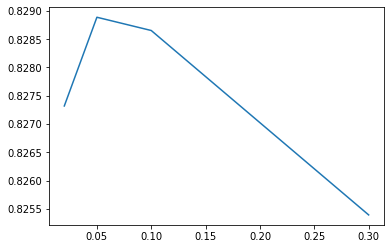

In [ ]:

plot_results_of_each_parameter("Max_depth", "Colsample_bytree", "n_estimators" , learning_rate_list)

mean-score - max-depth diagram

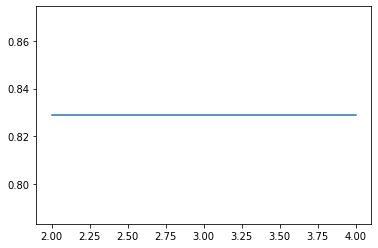

In [ ]:
plot_results_of_each_parameter("learning_rate", "Colsample_bytree", "n_estimators" , max_depth_list)

mean-score - colsample-bytree diagram

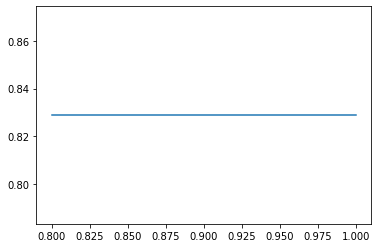

In [ ]:
plot_results_of_each_parameter("learning_rate", "Max_depth", "n_estimators" , colsample_bytree)

mean-score - n-estimators diagram

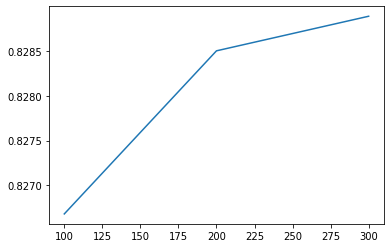

In [ ]:
plot_results_of_each_parameter("learning_rate", "Max_depth", "Colsample_bytree" , n_estimators_list)

مشاهده می شود که فاکتور های اول و آخر روی امتیاز تاثیر گذارند و 2 فاکتور دیگر عملا روی امتیاز تاثیر ندارند چون امتیاز به ازای مقادیر مختلف آنها ثابت مانده است
افزایش فاکتور اول در ابتدا موجب افزایش امتیاز می شود ولی در ادامه موجب کاهش امتیاز می شود
افزایش فاکتور آخر به صورت کلی موجب افزایش امتیاز می شود منتهی شیب این افزابش ابتدا تند تر وسپس کندتر می گردد  